# Credit Card Approval Prediction (Cleaned Version)

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
# set to display all the columns in dataset
pd.set_option("display.max_columns",None)
#to run sql quries on data frame
import pandasql as psql

In [2]:
#loading the dataset
credit_card=pd.read_csv(r"C:\Users\Dlc\21B91A12C4 project file\main project\Application_Data.csv",header=0)
#creating the backup file for the dataset
credit_card_bk=credit_card.copy()
credit_card.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,39,1


In [3]:
#checking the first 5 records
credit_card.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,39,1


In [4]:
#checking the null values in the dataset
credit_card.isnull().sum()

Applicant_ID            0
Applicant_Gender        0
Owned_Car               0
Owned_Realty            0
Total_Children          0
Total_Income            0
Income_Type             0
Education_Type          0
Family_Status           0
Housing_Type            0
Owned_Mobile_Phone      0
Owned_Work_Phone        0
Owned_Phone             0
Owned_Email             0
Job_Title               0
Total_Family_Members    0
Applicant_Age           0
Years_of_Working        0
Total_Bad_Debt          0
Total_Good_Debt         0
Status                  0
dtype: int64

In [5]:
#checking the duplicate values in the dataset
credit_card.duplicated().any()

False

In [6]:
#Display the unique values of all the variables 
credit_card.nunique()

Applicant_ID            25128
Applicant_Gender            2
Owned_Car                   2
Owned_Realty                2
Total_Children              6
Total_Income              195
Income_Type                 5
Education_Type              5
Family_Status               5
Housing_Type                6
Owned_Mobile_Phone          1
Owned_Work_Phone            2
Owned_Phone                 2
Owned_Email                 2
Job_Title                  18
Total_Family_Members        7
Applicant_Age              48
Years_of_Working           43
Total_Bad_Debt             33
Total_Good_Debt            61
Status                      2
dtype: int64

In [7]:
#display the unique values by count for 'Status'
credit_card['Status'].value_counts()

1    25007
0      121
Name: Status, dtype: int64

In [8]:
#Count the target or dependent variable by '0' and '1' and their proportion
#(> 10:1, then the dataset is imbalance data)
Status_count=credit_card.Status.value_counts()
print("Class 0: ",Status_count[0])
print("Class 1: ",Status_count[1])
print("Proportion: ",round(Status_count[1]/Status_count[0],2),':1')
print("Total records: ",len(credit_card))

Class 0:  121
Class 1:  25007
Proportion:  206.67 :1
Total records:  25128


In [9]:
#info of the dataset
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Total_Family_Members  25128 non-null

In [10]:
credit_card.head()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
0,5008806,M,1,1,0,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Security staff ...,2,59,4,0,30,1
1,5008808,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
2,5008809,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,5,1
3,5008810,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,27,1
4,5008811,F,0,1,0,270000,Commercial associate ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,0,1,1,Sales staff ...,1,53,9,0,39,1


In [11]:
#replace 'Applicant_Gender' variable and convert to integer value.
credit_card['Applicant_Gender'] = credit_card['Applicant_Gender'].str.replace('F','0')
credit_card['Applicant_Gender'] = credit_card['Applicant_Gender'].str.replace('M','1')
credit_card['Applicant_Gender'] = credit_card['Applicant_Gender'].astype(int)

In [12]:
#display the unique values by count for 'Status'
credit_card['Income_Type'].value_counts()

Working                                               15616
Commercial associate                                   7052
State servant                                          2437
Pensioner                                                13
Student                                                  10
Name: Income_Type, dtype: int64

In [13]:
#display the unique values by count for 'Education_Type'
credit_card['Education_Type'].value_counts()

Secondary / secondary special                         16802
Higher education                                       7132
Incomplete higher                                       993
Lower secondary                                         187
Academic degree                                          14
Name: Education_Type, dtype: int64

In [14]:
#display the unique values by count for 'Family_Status'
credit_card['Family_Status'].value_counts()

Married                                               17507
Single / not married                                   3444
Civil marriage                                         2133
Separated                                              1464
Widow                                                   580
Name: Family_Status, dtype: int64

In [15]:
#display the unique values by count for 'Housing_Type'
credit_card['Housing_Type'].value_counts()

House / apartment                                     22096
With parents                                           1430
Municipal apartment                                     812
Rented apartment                                        439
Office apartment                                        199
Co-op apartment                                         152
Name: Housing_Type, dtype: int64

In [16]:
#display the unique values by count for 'Job_Title'
credit_card['Job_Title'].value_counts()

Laborers                                              6211
Core staff                                            3591
Sales staff                                           3485
Managers                                              3012
Drivers                                               2135
High skill tech staff                                 1383
Accountants                                           1241
Medicine staff                                        1207
Cooking staff                                          655
Security staff                                         592
Cleaning staff                                         549
Private service staff                                  344
Low-skill Laborers                                     175
Waiters/barmen staff                                   173
Secretaries                                            151
HR staff                                                85
Realty agents                                           

In [17]:
#use LableEncoder for target variables
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
credit_card['Income_Type']=LE.fit_transform(credit_card['Income_Type'])

In [18]:
#use LableEncoder for target variables
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
credit_card['Education_Type']=LE.fit_transform(credit_card['Education_Type'])

In [19]:
#use LableEncoder for target variables
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
credit_card['Family_Status']=LE.fit_transform(credit_card['Family_Status'])

In [20]:
#use LableEncoder for target variables
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
credit_card['Housing_Type']=LE.fit_transform(credit_card['Housing_Type'])

In [21]:
#use LableEncoder for target variables
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
credit_card['Job_Title']=LE.fit_transform(credit_card['Job_Title'])

In [22]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Applicant_ID          25128 non-null  int64
 1   Applicant_Gender      25128 non-null  int32
 2   Owned_Car             25128 non-null  int64
 3   Owned_Realty          25128 non-null  int64
 4   Total_Children        25128 non-null  int64
 5   Total_Income          25128 non-null  int64
 6   Income_Type           25128 non-null  int32
 7   Education_Type        25128 non-null  int32
 8   Family_Status         25128 non-null  int32
 9   Housing_Type          25128 non-null  int32
 10  Owned_Mobile_Phone    25128 non-null  int64
 11  Owned_Work_Phone      25128 non-null  int64
 12  Owned_Phone           25128 non-null  int64
 13  Owned_Email           25128 non-null  int64
 14  Job_Title             25128 non-null  int32
 15  Total_Family_Members  25128 non-null  int64
 16  Appl

In [23]:
#display the Descriptive statistics
credit_card.describe()

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status
count,2.512800e+04,25128.000000,25128.000000,25128.000000,25128.000000,2.512800e+04,25128.000000,25128.000000,25128.000000,25128.000000,25128.0,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000,25128.000000
mean,5.078835e+06,0.378104,0.418378,0.654927,0.509472,1.948365e+05,2.681511,3.059814,1.316738,1.322151,1.0,0.273758,0.292741,0.100684,7.704473,2.291309,40.995503,7.690903,0.333095,21.057545,0.995185
std,4.194378e+04,0.484923,0.493303,0.475402,0.762937,1.045211e+05,1.773412,1.358305,0.893770,1.016895,0.0,0.445895,0.455030,0.300916,4.340208,0.928871,9.552832,6.415007,1.569448,14.735347,0.069227
min,5.008806e+06,0.000000,0.000000,0.000000,0.000000,2.700000e+04,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,1.000000,0.000000,1.000000,0.000000
25%,5.042226e+06,0.000000,0.000000,0.000000,0.000000,1.350000e+05,0.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,4.000000,2.000000,33.000000,3.000000,0.000000,9.000000,1.000000
50%,5.079004e+06,0.000000,0.000000,1.000000,0.000000,1.800000e+05,4.000000,4.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,8.000000,2.000000,40.000000,6.000000,0.000000,18.000000,1.000000
75%,5.115603e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,4.000000,4.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,10.000000,3.000000,48.000000,10.000000,0.000000,31.000000,1.000000
max,5.150487e+06,1.000000,1.000000,1.000000,5.000000,1.575000e+06,4.000000,4.000000,4.000000,5.000000,1.0,1.000000,1.000000,1.000000,17.000000,7.000000,68.000000,44.000000,49.000000,61.000000,1.000000


In [24]:
#Identify the independent and Target(dependent) variables
IndepVar=[]
for col in credit_card.columns:
    if col!='Status':
        IndepVar.append(col)
TargetVar='Status'
x=credit_card[IndepVar]
y=credit_card[TargetVar]

In [25]:
# Random oversampling can be implemented using the RandomOverSampler class
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.125)
x_over,y_over = oversample.fit_resample(x,y)
print(x_over.shape)
print(y_over.shape)

(28132, 20)
(28132,)


In [26]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.30, random_state = 42)
# Display the shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((19692, 20), (8440, 20), (19692,), (8440,))

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_train=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train)
x_test=scaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test)

In [28]:
Status_count=y_train.value_counts()
print("Proportion: ",round(Status_count[1]/Status_count[0],2),':1')

Proportion:  7.93 :1


In [29]:
KNN_Results=pd.read_csv(r"C:\Users\Dlc\21B91A12C4folder\KNN_Results.csv",header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# KNN algorithm 

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[7504   16]
 [   0  920]]
Outcome values : 
 7504 16 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7520
           0       0.98      1.00      0.99       920

    accuracy                           1.00      8440
   macro avg       0.99      1.00      1.00      8440
weighted avg       1.00      1.00      1.00      8440

Accuracy : 99.8 %
Precision : 100.0 %
Recall : 99.8 %
F1 Score : 0.999
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.9 %
MCC : 0.99
roc_auc_score: 0.999


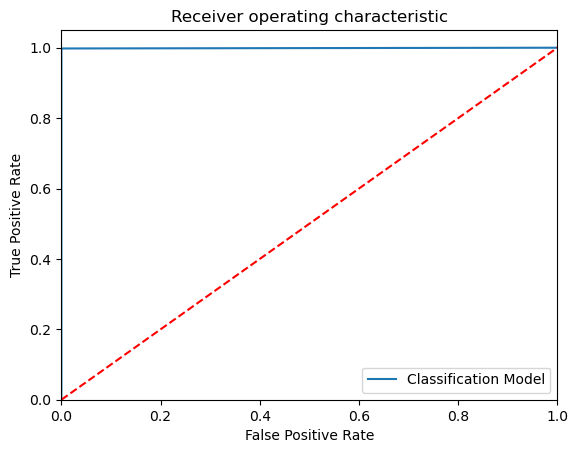

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[7492   28]
 [   0  920]]
Outcome values : 
 7492 28 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7520
           0       0.97      1.00      0.99       920

    accuracy                           1.00      8440
   macro avg       0.99      1.00      0.99      8440
weighted avg       1.00      1.00      1.00      8440

Accuracy : 99.7 %
Precision : 100.0 %
Recall : 99.6 %
F1 Score : 0.998
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.8 %
MCC : 0.983
roc_auc_score: 0.998


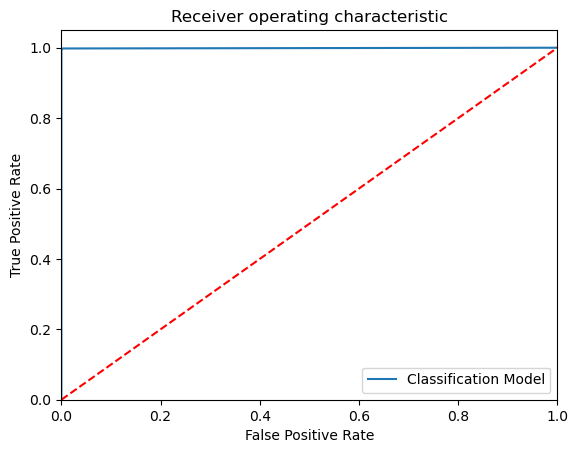

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[7492   28]
 [   0  920]]
Outcome values : 
 7492 28 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7520
           0       0.97      1.00      0.99       920

    accuracy                           1.00      8440
   macro avg       0.99      1.00      0.99      8440
weighted avg       1.00      1.00      1.00      8440

Accuracy : 99.7 %
Precision : 100.0 %
Recall : 99.6 %
F1 Score : 0.998
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.8 %
MCC : 0.983
roc_auc_score: 0.998


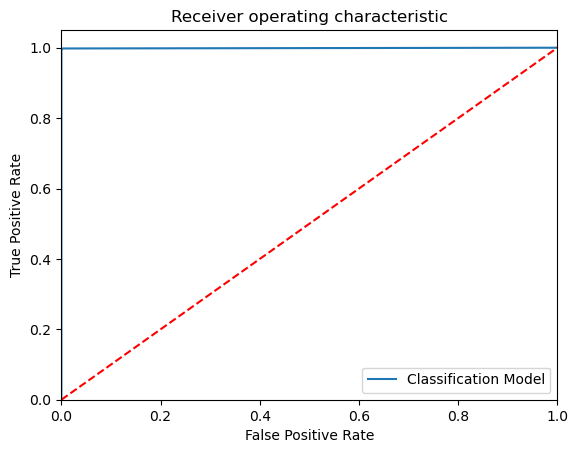

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[7473   47]
 [   0  920]]
Outcome values : 
 7473 47 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00      7520
           0       0.95      1.00      0.98       920

    accuracy                           0.99      8440
   macro avg       0.98      1.00      0.99      8440
weighted avg       0.99      0.99      0.99      8440

Accuracy : 99.4 %
Precision : 100.0 %
Recall : 99.4 %
F1 Score : 0.997
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.7 %
MCC : 0.972
roc_auc_score: 0.997


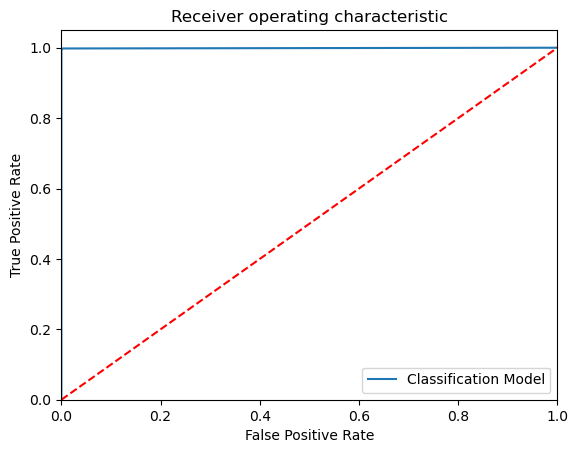

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[7473   47]
 [   0  920]]
Outcome values : 
 7473 47 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00      7520
           0       0.95      1.00      0.98       920

    accuracy                           0.99      8440
   macro avg       0.98      1.00      0.99      8440
weighted avg       0.99      0.99      0.99      8440

Accuracy : 99.4 %
Precision : 100.0 %
Recall : 99.4 %
F1 Score : 0.997
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.7 %
MCC : 0.972
roc_auc_score: 0.997


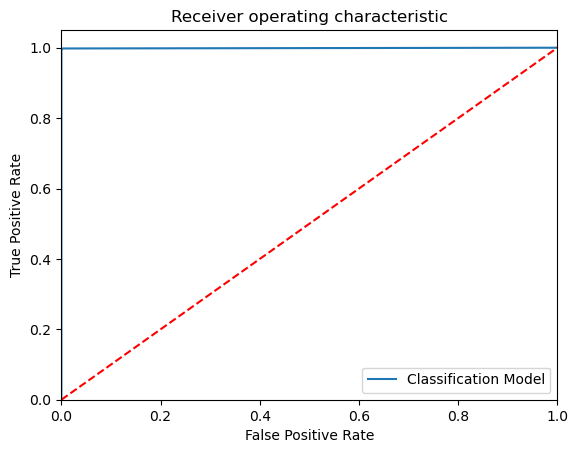

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[7457   63]
 [   0  920]]
Outcome values : 
 7457 63 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00      7520
           0       0.94      1.00      0.97       920

    accuracy                           0.99      8440
   macro avg       0.97      1.00      0.98      8440
weighted avg       0.99      0.99      0.99      8440

Accuracy : 99.3 %
Precision : 100.0 %
Recall : 99.2 %
F1 Score : 0.996
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.6 %
MCC : 0.963
roc_auc_score: 0.996


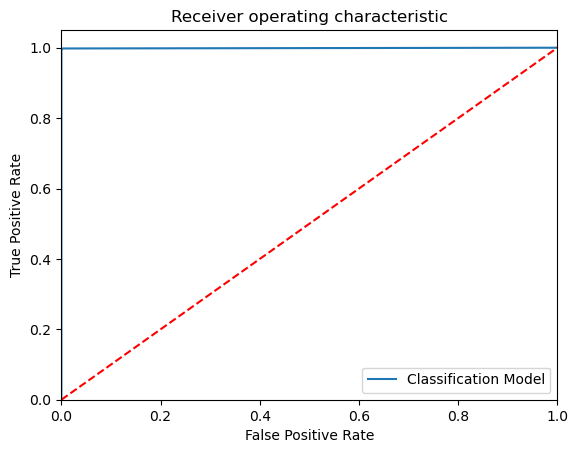

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[7457   63]
 [   0  920]]
Outcome values : 
 7457 63 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00      7520
           0       0.94      1.00      0.97       920

    accuracy                           0.99      8440
   macro avg       0.97      1.00      0.98      8440
weighted avg       0.99      0.99      0.99      8440

Accuracy : 99.3 %
Precision : 100.0 %
Recall : 99.2 %
F1 Score : 0.996
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.6 %
MCC : 0.963
roc_auc_score: 0.996


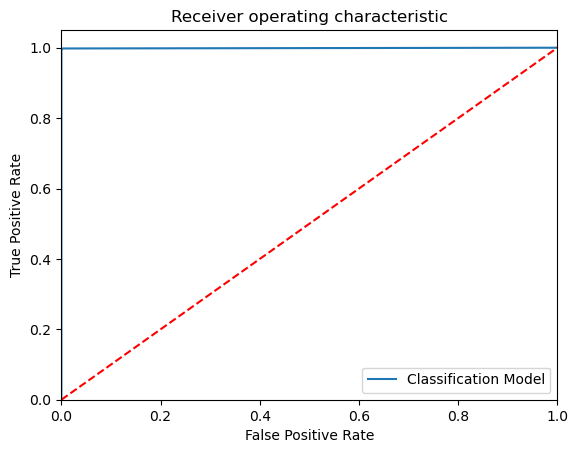

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[7431   89]
 [   0  920]]
Outcome values : 
 7431 89 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99      7520
           0       0.91      1.00      0.95       920

    accuracy                           0.99      8440
   macro avg       0.96      0.99      0.97      8440
weighted avg       0.99      0.99      0.99      8440

Accuracy : 98.9 %
Precision : 100.0 %
Recall : 98.8 %
F1 Score : 0.994
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.4 %
MCC : 0.949
roc_auc_score: 0.994


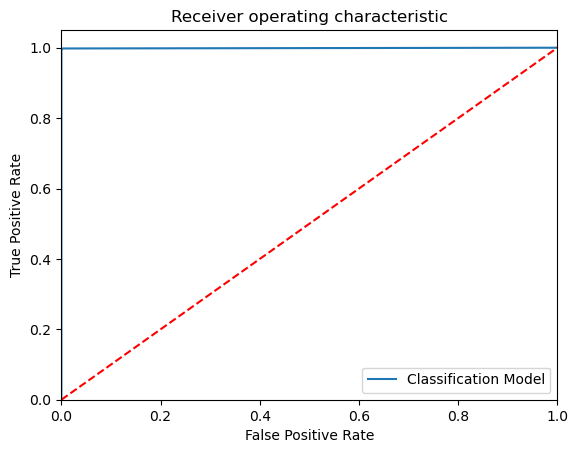

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[7431   89]
 [   0  920]]
Outcome values : 
 7431 89 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99      7520
           0       0.91      1.00      0.95       920

    accuracy                           0.99      8440
   macro avg       0.96      0.99      0.97      8440
weighted avg       0.99      0.99      0.99      8440

Accuracy : 98.9 %
Precision : 100.0 %
Recall : 98.8 %
F1 Score : 0.994
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.4 %
MCC : 0.949
roc_auc_score: 0.994


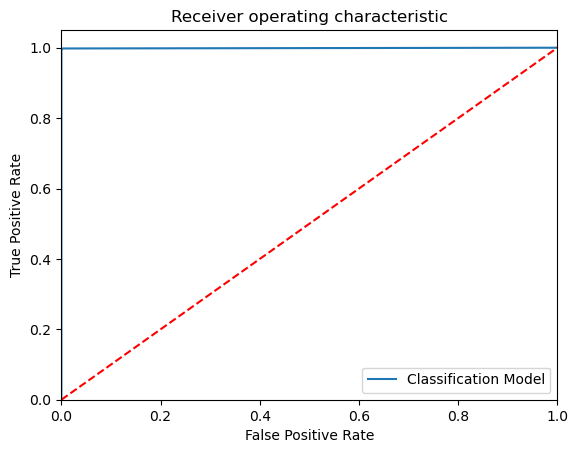

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[7412  108]
 [   0  920]]
Outcome values : 
 7412 108 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99      7520
           0       0.89      1.00      0.94       920

    accuracy                           0.99      8440
   macro avg       0.95      0.99      0.97      8440
weighted avg       0.99      0.99      0.99      8440

Accuracy : 98.7 %
Precision : 100.0 %
Recall : 98.6 %
F1 Score : 0.993
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.3 %
MCC : 0.939
roc_auc_score: 0.993


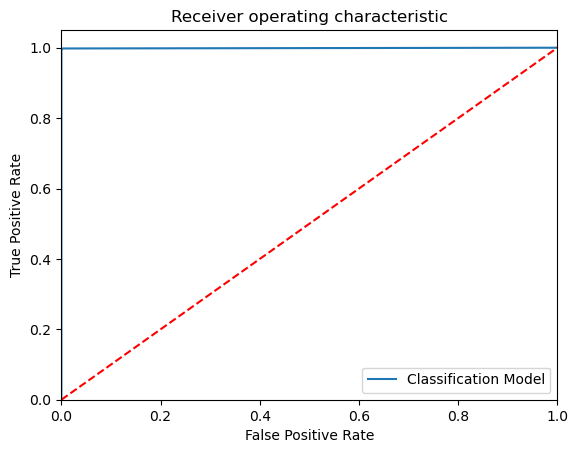

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[7412  108]
 [   0  920]]
Outcome values : 
 7412 108 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      0.99      7520
           0       0.89      1.00      0.94       920

    accuracy                           0.99      8440
   macro avg       0.95      0.99      0.97      8440
weighted avg       0.99      0.99      0.99      8440

Accuracy : 98.7 %
Precision : 100.0 %
Recall : 98.6 %
F1 Score : 0.993
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.3 %
MCC : 0.939
roc_auc_score: 0.993


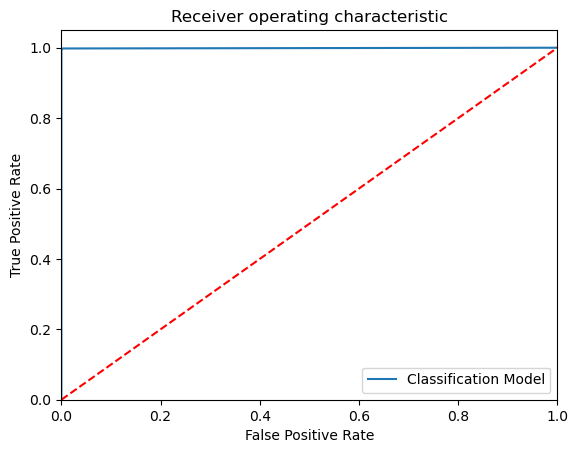

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[7378  142]
 [   0  920]]
Outcome values : 
 7378 142 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99      7520
           0       0.87      1.00      0.93       920

    accuracy                           0.98      8440
   macro avg       0.93      0.99      0.96      8440
weighted avg       0.99      0.98      0.98      8440

Accuracy : 98.3 %
Precision : 100.0 %
Recall : 98.1 %
F1 Score : 0.99
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.0 %
MCC : 0.922
roc_auc_score: 0.991


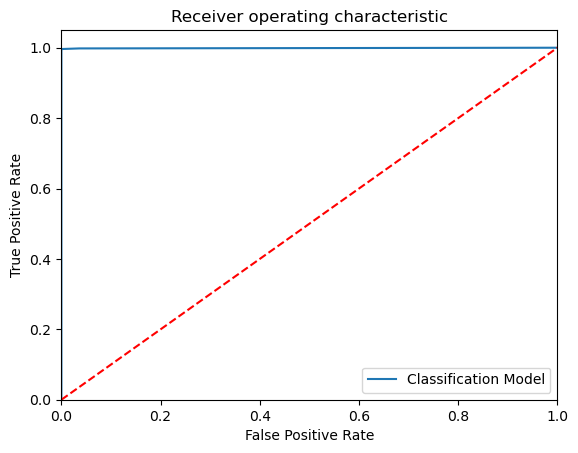

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[7378  142]
 [   0  920]]
Outcome values : 
 7378 142 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99      7520
           0       0.87      1.00      0.93       920

    accuracy                           0.98      8440
   macro avg       0.93      0.99      0.96      8440
weighted avg       0.99      0.98      0.98      8440

Accuracy : 98.3 %
Precision : 100.0 %
Recall : 98.1 %
F1 Score : 0.99
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.0 %
MCC : 0.922
roc_auc_score: 0.991


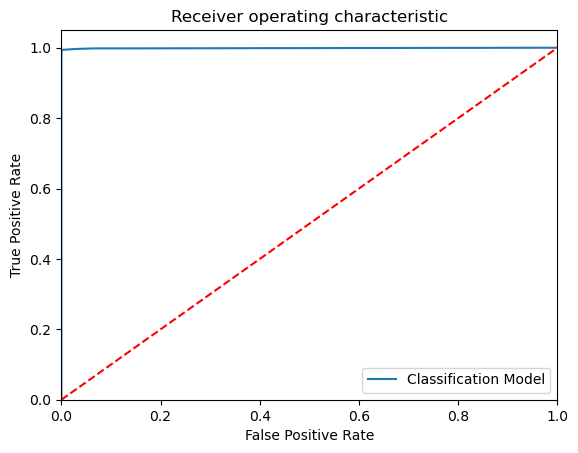

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[7358  162]
 [   0  920]]
Outcome values : 
 7358 162 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99      7520
           0       0.85      1.00      0.92       920

    accuracy                           0.98      8440
   macro avg       0.93      0.99      0.95      8440
weighted avg       0.98      0.98      0.98      8440

Accuracy : 98.1 %
Precision : 100.0 %
Recall : 97.8 %
F1 Score : 0.989
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 98.9 %
MCC : 0.912
roc_auc_score: 0.989


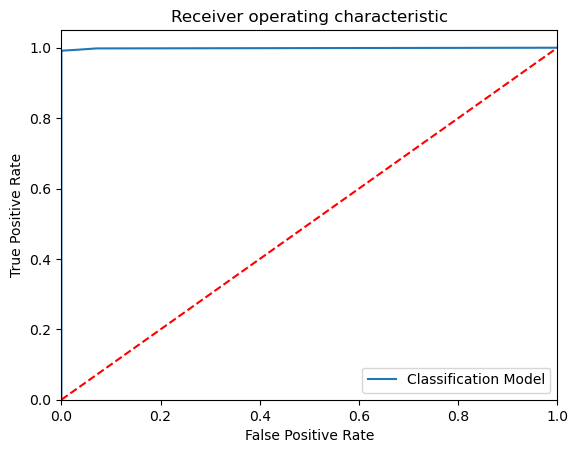

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[7358  162]
 [   0  920]]
Outcome values : 
 7358 162 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99      7520
           0       0.85      1.00      0.92       920

    accuracy                           0.98      8440
   macro avg       0.93      0.99      0.95      8440
weighted avg       0.98      0.98      0.98      8440

Accuracy : 98.1 %
Precision : 100.0 %
Recall : 97.8 %
F1 Score : 0.989
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 98.9 %
MCC : 0.912
roc_auc_score: 0.989


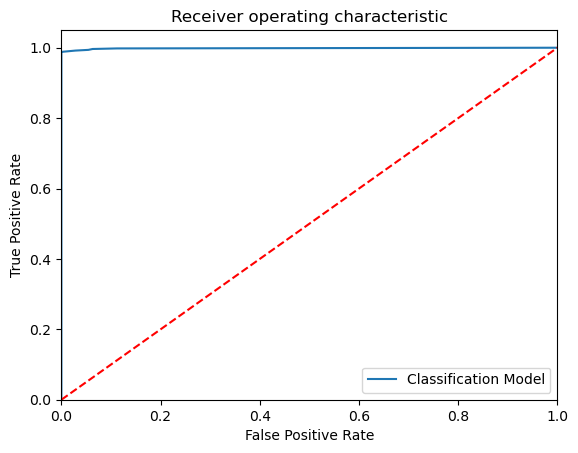

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[7329  191]
 [   0  920]]
Outcome values : 
 7329 191 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.97      0.99      7520
           0       0.83      1.00      0.91       920

    accuracy                           0.98      8440
   macro avg       0.91      0.99      0.95      8440
weighted avg       0.98      0.98      0.98      8440

Accuracy : 97.7 %
Precision : 100.0 %
Recall : 97.5 %
F1 Score : 0.987
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 98.8 %
MCC : 0.898
roc_auc_score: 0.987


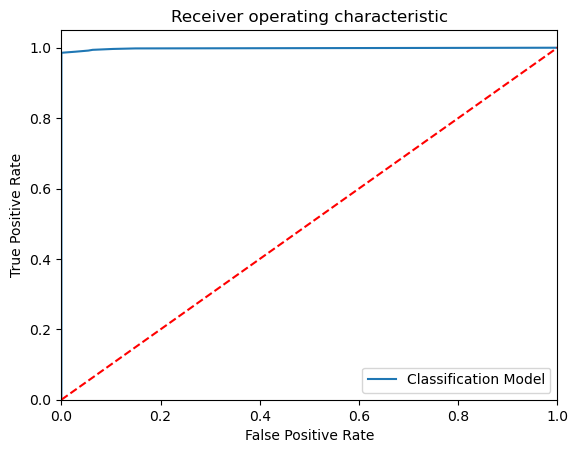

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[7329  191]
 [   0  920]]
Outcome values : 
 7329 191 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.97      0.99      7520
           0       0.83      1.00      0.91       920

    accuracy                           0.98      8440
   macro avg       0.91      0.99      0.95      8440
weighted avg       0.98      0.98      0.98      8440

Accuracy : 97.7 %
Precision : 100.0 %
Recall : 97.5 %
F1 Score : 0.987
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 98.8 %
MCC : 0.898
roc_auc_score: 0.987


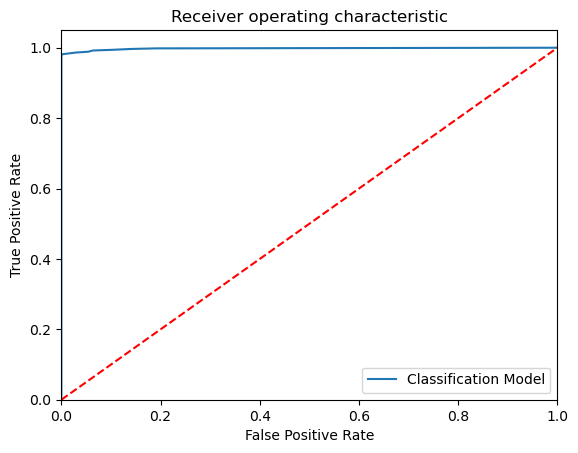

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[7301  219]
 [   0  920]]
Outcome values : 
 7301 219 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.97      0.99      7520
           0       0.81      1.00      0.89       920

    accuracy                           0.97      8440
   macro avg       0.90      0.99      0.94      8440
weighted avg       0.98      0.97      0.98      8440

Accuracy : 97.4 %
Precision : 100.0 %
Recall : 97.1 %
F1 Score : 0.985
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 98.6 %
MCC : 0.886
roc_auc_score: 0.985


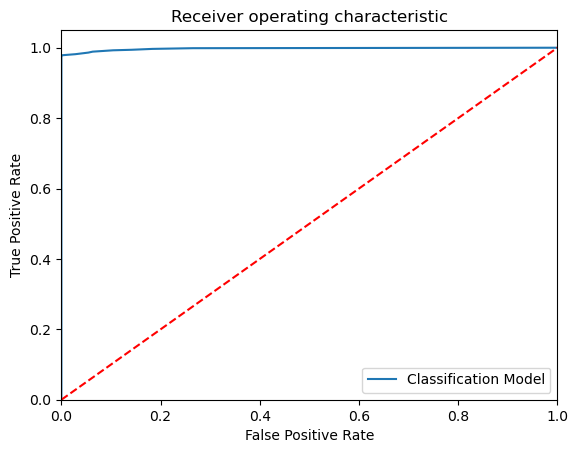

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[7301  219]
 [   0  920]]
Outcome values : 
 7301 219 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.97      0.99      7520
           0       0.81      1.00      0.89       920

    accuracy                           0.97      8440
   macro avg       0.90      0.99      0.94      8440
weighted avg       0.98      0.97      0.98      8440

Accuracy : 97.4 %
Precision : 100.0 %
Recall : 97.1 %
F1 Score : 0.985
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 98.6 %
MCC : 0.886
roc_auc_score: 0.985


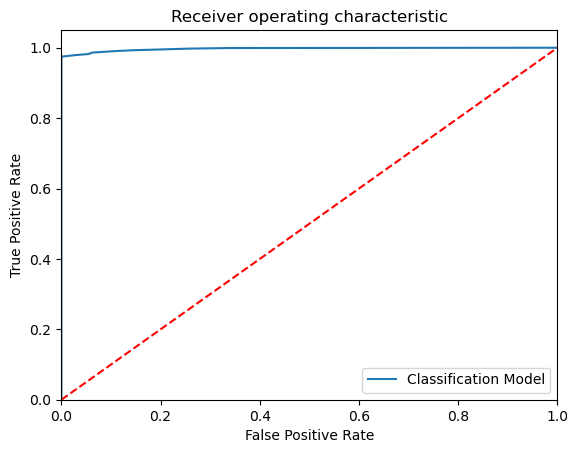

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[7273  247]
 [   0  920]]
Outcome values : 
 7273 247 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.97      0.98      7520
           0       0.79      1.00      0.88       920

    accuracy                           0.97      8440
   macro avg       0.89      0.98      0.93      8440
weighted avg       0.98      0.97      0.97      8440

Accuracy : 97.1 %
Precision : 100.0 %
Recall : 96.7 %
F1 Score : 0.983
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 98.4 %
MCC : 0.873
roc_auc_score: 0.984


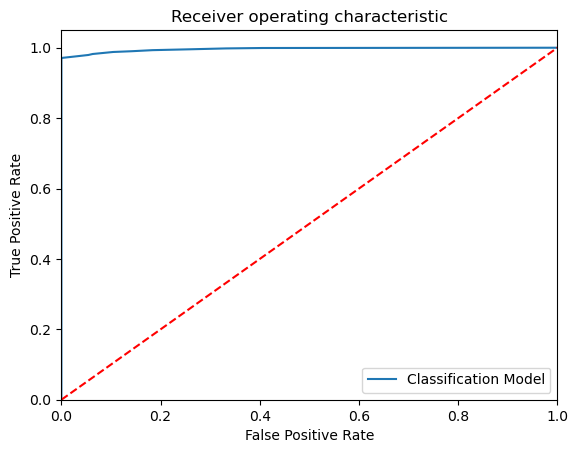

In [30]:
# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
   
    k = a
   
    # Build the model
   
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
   
    # Train the model
   
    ModelKNN.fit(x_train, y_train)
   
    # Predict the model
   
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
   
    print('KNN_K_value = ', a)
   
    # Print the model name
   
    print('Model Name: ', ModelKNN)
   
    # confusion matrix in sklearn
   
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
   
    # actual values
   
    actual = y_test
   
    # predicted values
   
    predicted = y_pred
   
    # confusion matrix
   
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
   
    # outcome values order in sklearn
   
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
   
    # classification report for precision, recall f1-score and accuracy
   
    C_Report = classification_report(actual,predicted,labels=[1,0])
   
    print('Classification report : \n', C_Report)
   
    # calculating the metrics
   
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
   
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
   
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model
   
    from math import sqrt
   
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
   
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
   
    # Area under ROC curve
   
    from sklearn.metrics import roc_curve, roc_auc_score
   
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
   
    # ROC Curve
   
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------

In [31]:
KNN_Results.head(20)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,7504,16,0,920,0.998,1.0,0.998,0.999,1.0,0.990,0.998936,0.999
1,KNeighborsClassifier(n_neighbors=2),2,7492,28,0,920,0.997,1.0,0.996,0.998,1.0,0.983,0.998138,0.998
2,KNeighborsClassifier(n_neighbors=3),3,7492,28,0,920,0.997,1.0,0.996,0.998,1.0,0.983,0.998138,0.998
3,KNeighborsClassifier(n_neighbors=4),4,7473,47,0,920,0.994,1.0,0.994,0.997,1.0,0.972,0.996875,0.997
4,KNeighborsClassifier(),5,7473,47,0,920,0.994,1.0,0.994,0.997,1.0,0.972,0.996875,0.997
5,KNeighborsClassifier(n_neighbors=6),6,7457,63,0,920,0.993,1.0,0.992,0.996,1.0,0.963,0.995811,0.996
6,KNeighborsClassifier(n_neighbors=7),7,7457,63,0,920,0.993,1.0,0.992,0.996,1.0,0.963,0.995811,0.996
7,KNeighborsClassifier(n_neighbors=8),8,7431,89,0,920,0.989,1.0,0.988,0.994,1.0,0.949,0.994082,0.994
8,KNeighborsClassifier(n_neighbors=9),9,7431,89,0,920,0.989,1.0,0.988,0.994,1.0,0.949,0.994082,0.994
9,KNeighborsClassifier(n_neighbors=10),10,7412,108,0,920,0.987,1.0,0.986,0.993,1.0,0.939,0.992819,0.993


In [32]:
EMResults1=pd.read_csv(r"C:\Users\Dlc\21B91A12C4folder\EMResults.csv",header=0)
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM Linear kernel

Model Name:  SVM - Linear
Confusion matrix : 
 [[7505   15]
 [  73  847]]
Outcome values : 
 7505 15 73 847
Classification report : 
               precision    recall  f1-score   support

           1       0.99      1.00      0.99      7520
           0       0.98      0.92      0.95       920

    accuracy                           0.99      8440
   macro avg       0.99      0.96      0.97      8440
weighted avg       0.99      0.99      0.99      8440

Accuracy : 99.0 %
Precision : 99.0 %
Recall : 99.8 %
F1 Score : 0.994
Specificity or True Negative Rate : 92.1 %
Balanced Accuracy : 96.0 %
MCC : 0.945
roc_auc_score: 0.959


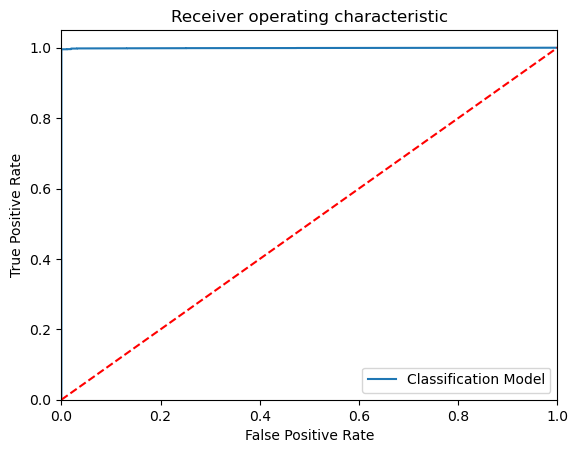

-----------------------------------------------------------------------------------------------------


In [33]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

# SVM -Polynomial

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[7494   26]
 [   2  918]]
Outcome values : 
 7494 26 2 918
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7520
           0       0.97      1.00      0.98       920

    accuracy                           1.00      8440
   macro avg       0.99      1.00      0.99      8440
weighted avg       1.00      1.00      1.00      8440

Accuracy : 99.7 %
Precision : 100.0 %
Recall : 99.7 %
F1 Score : 0.998
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 99.8 %
MCC : 0.983
roc_auc_score: 0.997


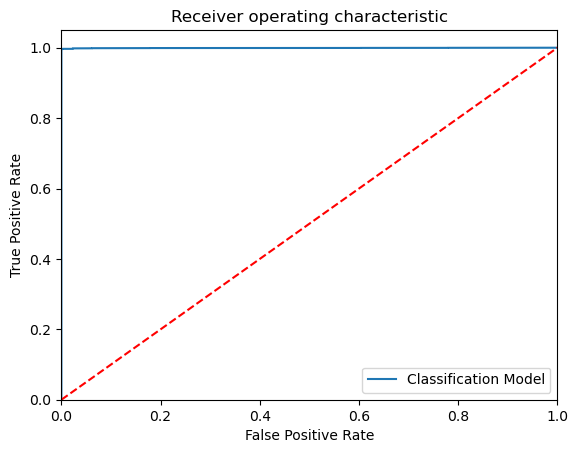

-----------------------------------------------------------------------------------------------------


In [34]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

# SVM sigmoid kernel

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[4627 2893]
 [ 327  593]]
Outcome values : 
 4627 2893 327 593
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.62      0.74      7520
           0       0.17      0.64      0.27       920

    accuracy                           0.62      8440
   macro avg       0.55      0.63      0.51      8440
weighted avg       0.85      0.62      0.69      8440

Accuracy : 61.8 %
Precision : 93.4 %
Recall : 61.5 %
F1 Score : 0.742
Specificity or True Negative Rate : 64.5 %
Balanced Accuracy : 63.0 %
MCC : 0.164
roc_auc_score: 0.63


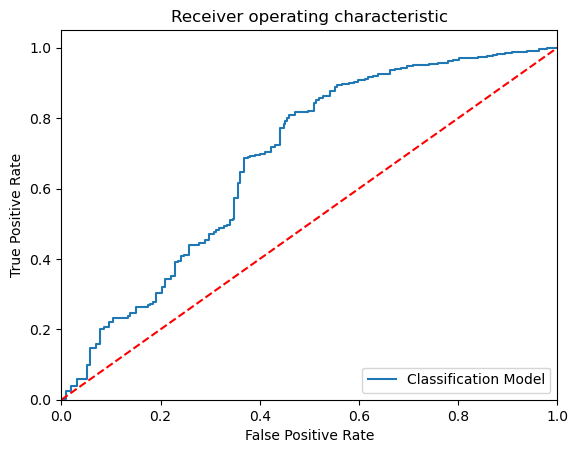

-----------------------------------------------------------------------------------------------------


In [35]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

# SVM gaussian

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[7457   63]
 [   0  920]]
Outcome values : 
 7457 63 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00      7520
           0       0.94      1.00      0.97       920

    accuracy                           0.99      8440
   macro avg       0.97      1.00      0.98      8440
weighted avg       0.99      0.99      0.99      8440

Accuracy : 99.3 %
Precision : 100.0 %
Recall : 99.2 %
F1 Score : 0.996
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.6 %
MCC : 0.963
roc_auc_score: 0.996


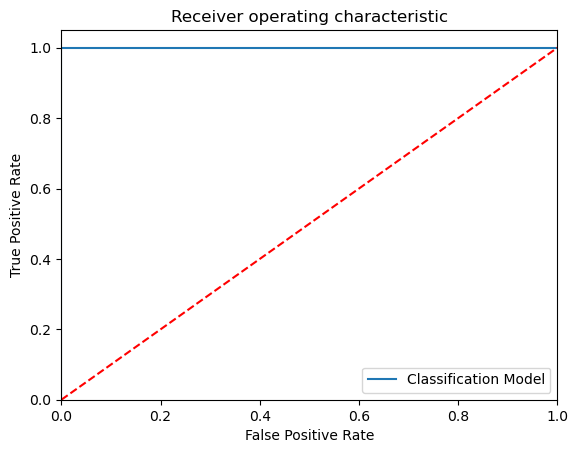

-----------------------------------------------------------------------------------------------------


In [36]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

In [37]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,7505,15,73,847,0.990,0.990,0.998,0.994,0.921,0.945,0.959329,0.960
1,SVM - Polynominal,7494,26,2,918,0.997,1.000,0.997,0.998,0.998,0.983,0.997184,0.998
2,SVM - Sigmoid,4627,2893,327,593,0.618,0.934,0.615,0.742,0.645,0.164,0.629929,0.630
3,SVM - Gaussian,7457,63,0,920,0.993,1.000,0.992,0.996,1.000,0.963,0.995811,0.996


In [38]:
EMResults=pd.read_csv(r"C:\Users\Dlc\21B91A12C4folder\EMResults.csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# compare the algorithms

Model Name:  LogisticRegression()
Confusion matrix : 
 [[7512    8]
 [ 172  748]]
Outcome values : 
 7512 8 172 748
Classification report : 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99      7520
           0       0.99      0.81      0.89       920

    accuracy                           0.98      8440
   macro avg       0.98      0.91      0.94      8440
weighted avg       0.98      0.98      0.98      8440

Accuracy : 97.9 %
Precision : 97.8 %
Recall : 99.9 %
F1 Score : 0.988
Specificity or True Negative Rate : 81.3 %
Balanced Accuracy : 90.6 %
MCC : 0.886
roc_auc_score: 0.906


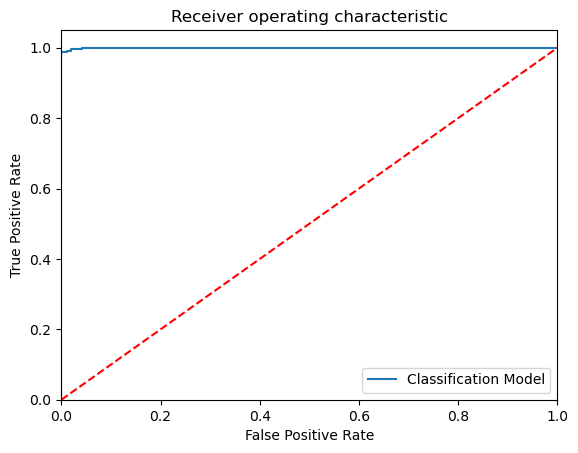

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[7511    9]
 [   9  911]]
Outcome values : 
 7511 9 9 911
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7520
           0       0.99      0.99      0.99       920

    accuracy                           1.00      8440
   macro avg       0.99      0.99      0.99      8440
weighted avg       1.00      1.00      1.00      8440

Accuracy : 99.8 %
Precision : 99.9 %
Recall : 99.9 %
F1 Score : 0.999
Specificity or True Negative Rate : 99.0 %
Balanced Accuracy : 99.4 %
MCC : 0.989
roc_auc_score: 0.995


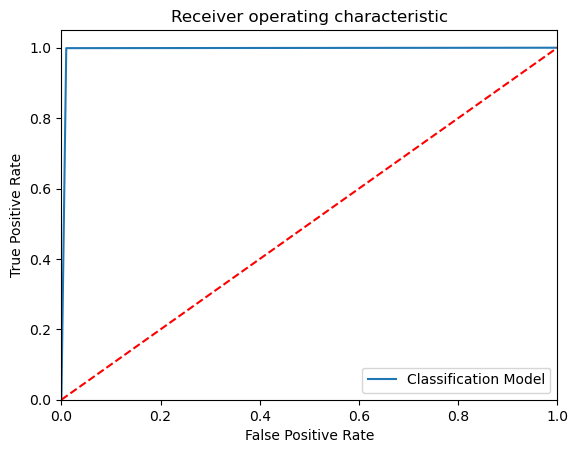

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[7519    1]
 [   0  920]]
Outcome values : 
 7519 1 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7520
           0       1.00      1.00      1.00       920

    accuracy                           1.00      8440
   macro avg       1.00      1.00      1.00      8440
weighted avg       1.00      1.00      1.00      8440

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 0.999
roc_auc_score: 1.0


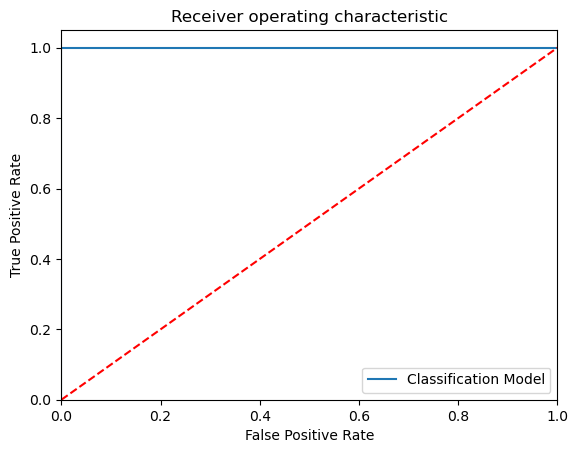

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[7519    1]
 [   0  920]]
Outcome values : 
 7519 1 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      7520
           0       1.00      1.00      1.00       920

    accuracy                           1.00      8440
   macro avg       1.00      1.00      1.00      8440
weighted avg       1.00      1.00      1.00      8440

Accuracy : 100.0 %
Precision : 100.0 %
Recall : 100.0 %
F1 Score : 1.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 100.0 %
MCC : 0.999
roc_auc_score: 1.0


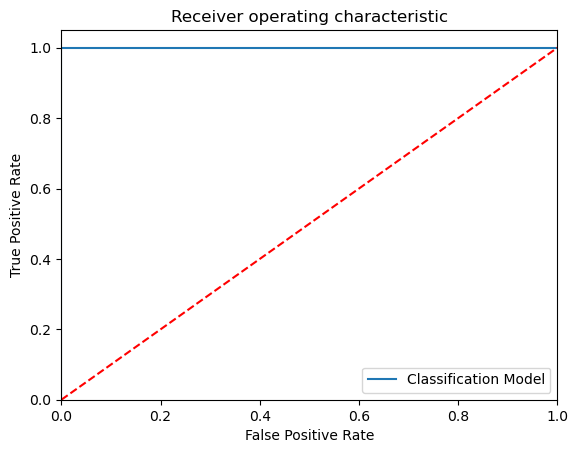

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[7473   47]
 [   0  920]]
Outcome values : 
 7473 47 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00      7520
           0       0.95      1.00      0.98       920

    accuracy                           0.99      8440
   macro avg       0.98      1.00      0.99      8440
weighted avg       0.99      0.99      0.99      8440

Accuracy : 99.4 %
Precision : 100.0 %
Recall : 99.4 %
F1 Score : 0.997
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.7 %
MCC : 0.972
roc_auc_score: 0.997


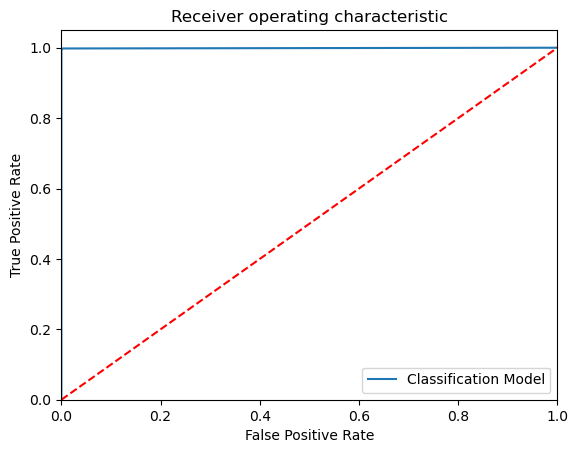

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[7457   63]
 [   0  920]]
Outcome values : 
 7457 63 0 920
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.99      1.00      7520
           0       0.94      1.00      0.97       920

    accuracy                           0.99      8440
   macro avg       0.97      1.00      0.98      8440
weighted avg       0.99      0.99      0.99      8440

Accuracy : 99.3 %
Precision : 100.0 %
Recall : 99.2 %
F1 Score : 0.996
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 99.6 %
MCC : 0.963
roc_auc_score: 0.996


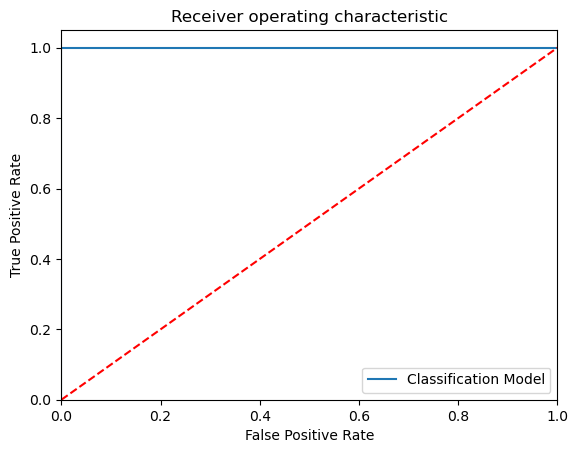

-----------------------------------------------------------------------------------------------------


In [39]:

# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM]

for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #------------------------------------------------------------------------------------------------------------------


In [40]:
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),7512,8,172,748,0.979,0.978,0.999,0.988,0.813,0.886,0.905990,0.906
1,DecisionTreeClassifier(),7511,9,9,911,0.998,0.999,0.999,0.999,0.990,0.989,0.994510,0.994
2,"(DecisionTreeClassifier(max_features='auto', r...",7519,1,0,920,1.000,1.000,1.000,1.000,1.000,0.999,0.999934,1.000
3,"(ExtraTreeClassifier(random_state=334698397), ...",7519,1,0,920,1.000,1.000,1.000,1.000,1.000,0.999,0.999934,1.000
4,KNeighborsClassifier(),7473,47,0,920,0.994,1.000,0.994,0.997,1.000,0.972,0.996875,0.997
5,"SVC(class_weight='balanced', probability=True,...",7457,63,0,920,0.993,1.000,0.992,0.996,1.000,0.963,0.995811,0.996


In [41]:
#predicting the value using the decision tree
#predict the values with KNN algorithm
y_pred=ModelRF.predict(x_test)

In [42]:
#display the final results 
Results = pd.DataFrame({'Status_A':y_test, 'Status_P':y_pred})
#Merge two Dataframes on index of both the dataframes
ResultsFinal = credit_card_bk.merge(Results,left_index=True,right_index=True)
# Calculate the %of Error
ResultsFinal['%Error'] = round(((ResultsFinal['Status_A']-ResultsFinal['Status_P'])/ResultsFinal['Status_A'])*100,3)
#display 10 records randomly
ResultsFinal.sample(10)

,Applicant_ID,Applicant_Gender,Owned_Car,Owned_Realty,Total_Children,Total_Income,Income_Type,Education_Type,Family_Status,Housing_Type,Owned_Mobile_Phone,Owned_Work_Phone,Owned_Phone,Owned_Email,Job_Title,Total_Family_Members,Applicant_Age,Years_of_Working,Total_Bad_Debt,Total_Good_Debt,Status,Status_A,Status_P,%Error
23323,5142971,M,0,0,1,180000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,1,1,0,Laborers ...,3,30,3,2,33,1,1,1,0.0
16264,5096992,F,0,0,1,81000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,1,1,0,Secretaries ...,3,25,1,0,16,1,1,1,0.0
9406,5058316,F,0,1,0,247500,Working ...,Secondary / secondary special ...,Civil marriage ...,House / apartment ...,1,0,0,0,Laborers ...,2,47,19,0,31,1,1,1,0.0
8225,5052918,M,0,0,0,270000,Commercial associate ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Laborers ...,2,38,11,0,12,1,1,1,0.0
10138,5062454,F,0,1,0,81000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,0,0,0,Medicine staff ...,2,43,5,0,60,1,1,1,0.0
14668,5091405,F,0,1,0,135000,Working ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,1,0,0,Laborers ...,1,49,6,4,27,1,1,1,0.0
3620,5026273,F,0,1,2,112500,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,1,1,0,Laborers ...,4,39,2,0,2,1,1,1,0.0
20796,5125554,F,0,0,0,94500,Working ...,Secondary / secondary special ...,Single / not married ...,House / apartment ...,1,1,0,0,Laborers ...,1,43,2,0,14,1,1,1,0.0
6604,5045403,F,0,1,1,126000,Working ...,Secondary / secondary special ...,Married ...,House / apartment ...,1,1,1,0,Cleaning staff ...,3,32,4,0,12,1,1,1,0.0
6355,5042336,F,0,1,1,90000,Working ...,Higher education ...,Married ...,House / apartment ...,1,0,0,0,Laborers ...,3,29,7,0,15,1,1,1,0.0
